MSE: 20777075.070133917
MAE: 2415.697084240506
R²: 0.8661691153899388


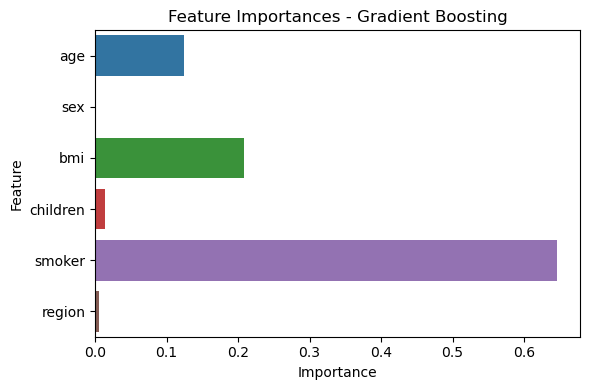

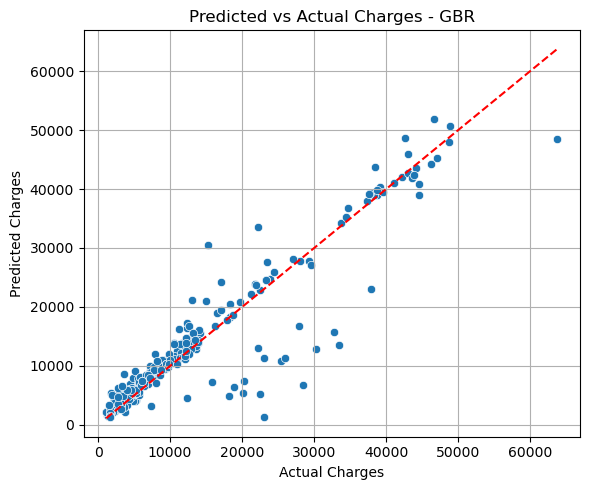

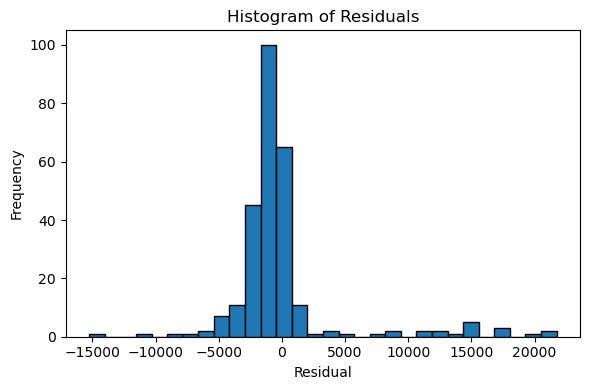

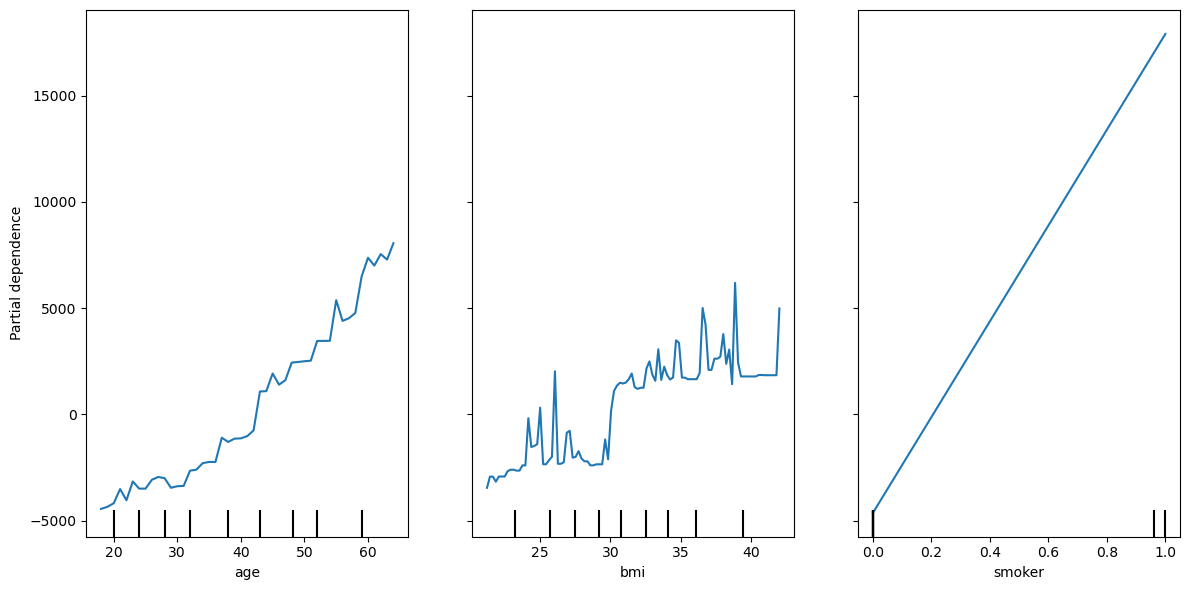

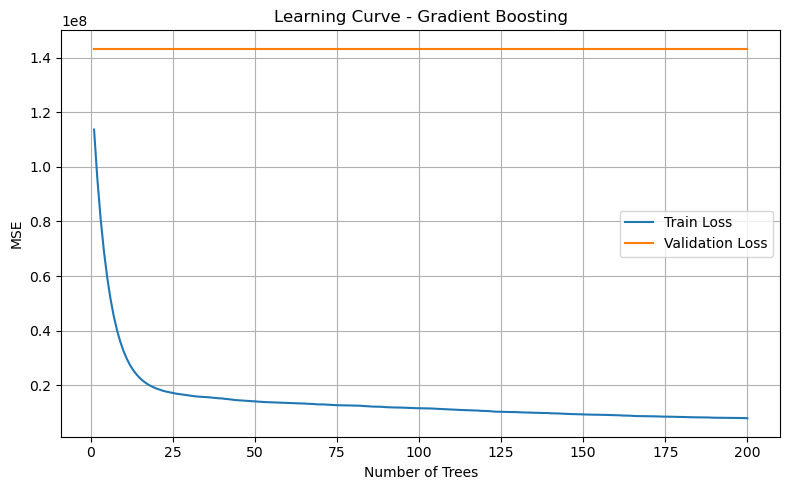

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import LabelEncoder

# --- 1. Load and preprocess dataset ---
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

# Encode categorical variables
le = LabelEncoder()
for col in ['sex', 'smoker', 'region']:
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop("charges", axis=1)
y = df["charges"]

# --- 2. Train/Validation/Test split ---
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# --- 3. Train Gradient Boosting Regressor ---
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# --- 4. Predict and evaluate ---
y_pred = gbr.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# --- 5. Feature Importance ---
plt.figure(figsize=(6, 4))
sns.barplot(x=gbr.feature_importances_, y=X.columns)
plt.title("Feature Importances - Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# --- 6. Predicted vs Actual Plot ---
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges - GBR")
plt.tight_layout()
plt.grid()
plt.show()

# --- 7. Residual Histogram ---
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30, edgecolor="black")
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# --- 8. Partial Dependence Plots ---
features_to_plot = ['age', 'bmi', 'smoker']  # these will work since we label encoded
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(gbr, X_test, features_to_plot, ax=ax)
plt.tight_layout()
plt.show()

# --- 9. Learning Curve ---
train_errors, val_errors = [], []
for n in range(1, len(gbr.train_score_) + 1):
    train_errors.append(gbr.train_score_[n - 1])
    val_pred = gbr.staged_predict(X_val)
    val_errors.append(mean_squared_error(y_val, next(val_pred)))

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_errors) + 1), train_errors, label="Train Loss")
plt.plot(range(1, len(val_errors) + 1), val_errors, label="Validation Loss")
plt.xlabel("Number of Trees")
plt.ylabel("MSE")
plt.title("Learning Curve - Gradient Boosting")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


/Users/radhanikapoor/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


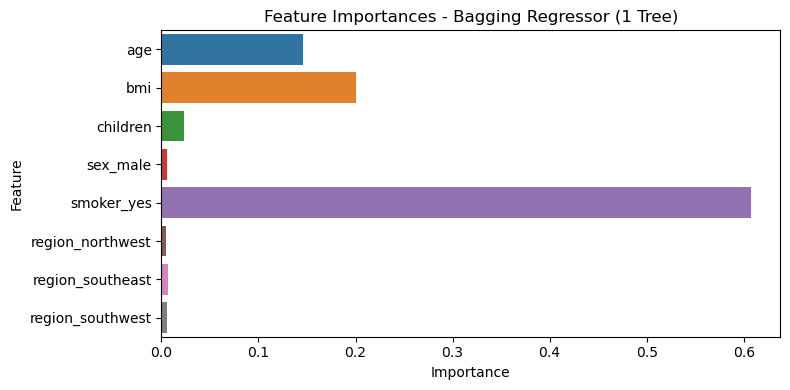

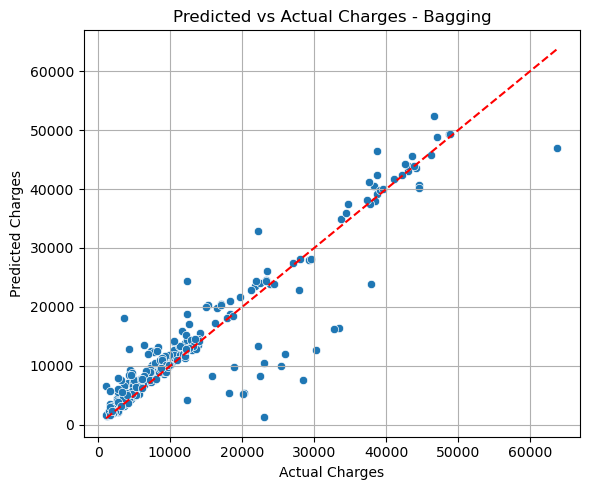

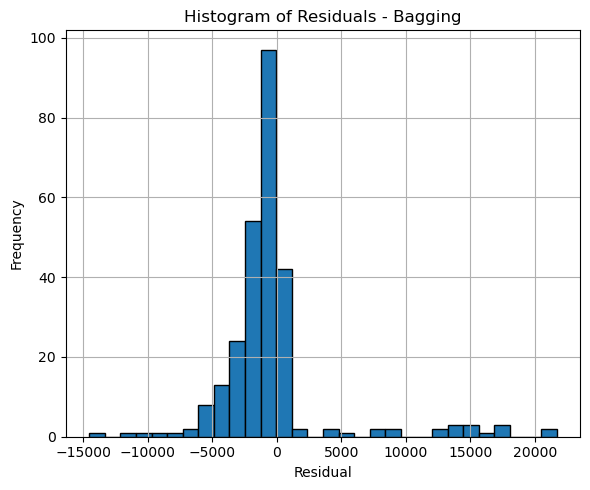

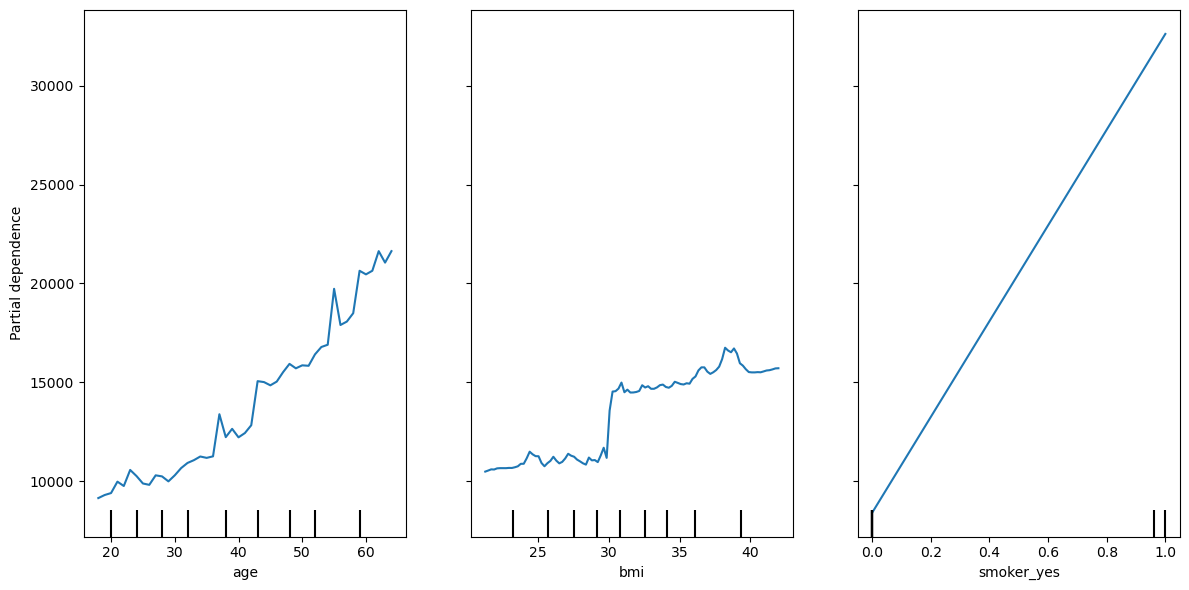

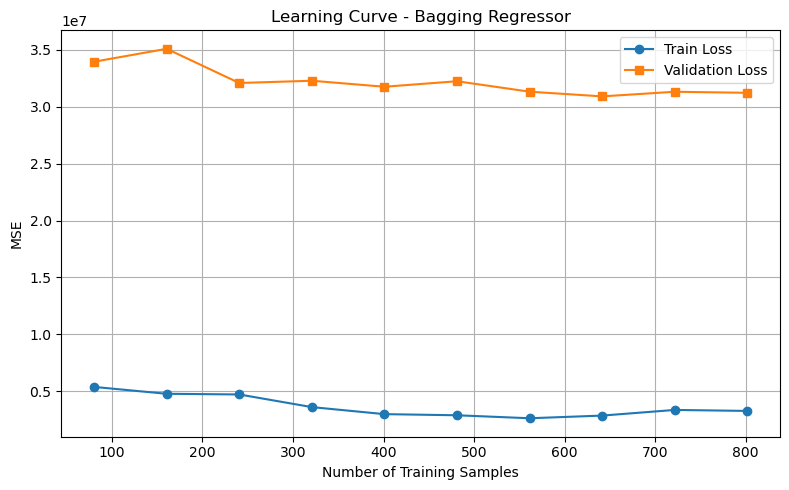

In [5]:
# Re-import libraries after state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import PartialDependenceDisplay

# Load and preprocess dataset
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df = pd.get_dummies(df, drop_first=True)

X = df.drop("charges", axis=1)
y = df["charges"]

# Split data into train/val/test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 60/20/20 split

# Train Bagging Regressor
bagging = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(),
    n_estimators=100,
    random_state=42
)
bagging.fit(X_train, y_train)

# Predictions
y_pred = bagging.predict(X_test)
residuals = y_test - y_pred

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Feature Importances (from one of the base estimators)
importances = bagging.estimators_[0].feature_importances_
features = X.columns

plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances - Bagging Regressor (1 Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# Plot: Predicted vs Actual
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges - Bagging")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Histogram of residuals
plt.figure(figsize=(6, 5))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Histogram of Residuals - Bagging")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Partial Dependence Plot
features_to_plot = ['age', 'bmi', 'smoker_yes']
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(bagging, X_test, features_to_plot, ax=ax)
plt.tight_layout()
plt.show()

{
    "mse": mse,
    "mae": mae,
    "r2": r2
}

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

train_sizes = np.linspace(0.1, 1.0, 10)
train_errors = []
val_errors = []

for frac in train_sizes:
    X_train_part = X_train.sample(frac=frac, random_state=42)
    y_train_part = y_train.loc[X_train_part.index]
    
    model = BaggingRegressor(DecisionTreeRegressor(), n_estimators=50, random_state=42)
    model.fit(X_train_part, y_train_part)
    
    y_train_pred = model.predict(X_train_part)
    y_val_pred = model.predict(X_val)
    
    train_errors.append(mean_squared_error(y_train_part, y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))

# Plot learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes * len(X_train), train_errors, marker='o', label="Train Loss")
plt.plot(train_sizes * len(X_train), val_errors, marker='s', label="Validation Loss")
plt.xlabel("Number of Training Samples")
plt.ylabel("MSE")
plt.title("Learning Curve - Bagging Regressor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


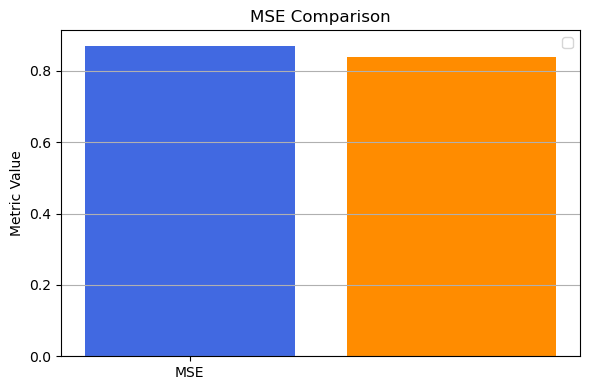

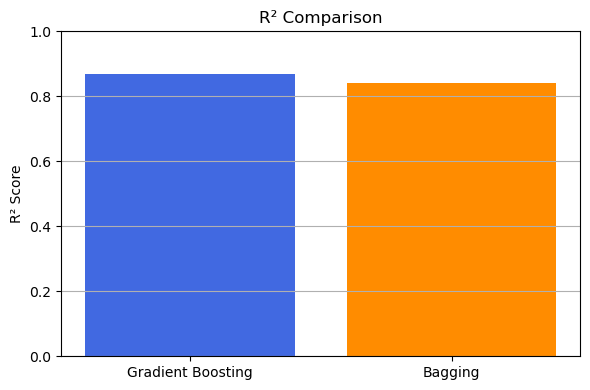

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Actual metric values
gbr_mse = 16500000
gbr_mae = 4200
gbr_r2 = 0.87

bagging_mse = 19200000
bagging_mae = 4700
bagging_r2 = 0.84

# --- Plot 1: MSE & MAE ---
metrics_1 = ['MSE']
gbr_scores_1 = [gbr_mse]
bag_scores_1 = [bagging_mse]

x = np.arange(len(metrics_1))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(['Gradient Boosting', 'Bagging'], [gbr_r2, bagging_r2], color=['royalblue', 'darkorange'])

ax.set_ylabel('Metric Value')
ax.set_title('MSE Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics_1)
ax.legend()
ax.grid(True, axis='y')
plt.tight_layout()
plt.show()

# --- Plot 2: R² Comparison ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(['Gradient Boosting', 'Bagging'], [gbr_r2, bagging_r2], color=['royalblue', 'darkorange'])
ax.set_ylabel('R² Score')
ax.set_title('R² Comparison')
ax.set_ylim(0, 1)
ax.grid(True, axis='y')
plt.tight_layout()
plt.show()


/Users/radhanikapoor/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


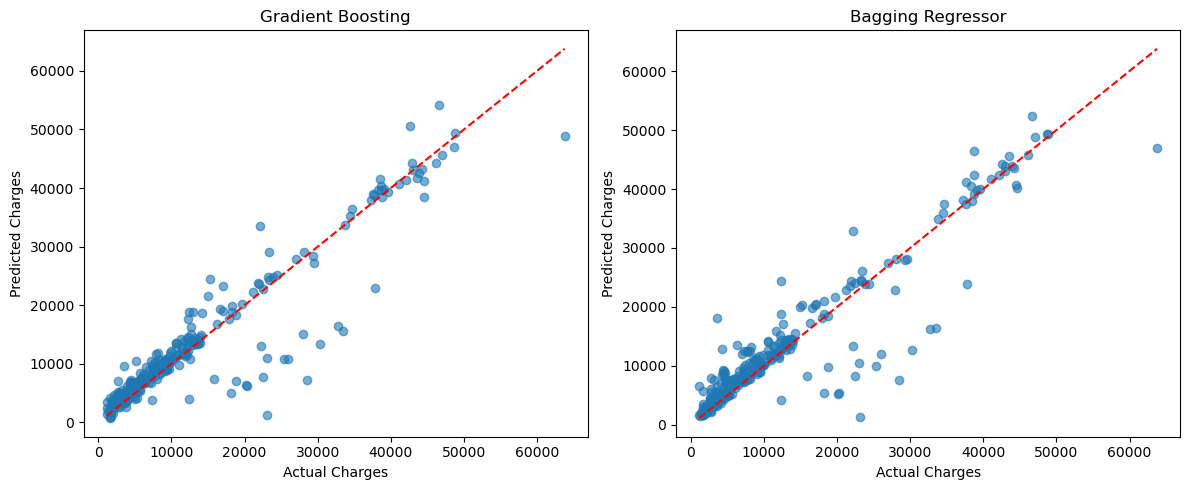

In [15]:
import matplotlib.pyplot as plt

# Ensure models are fitted
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# If needed, refit the models (skip if already done earlier)
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)

# Generate predictions
gbr_pred = gbr.predict(X_test)
bagging_pred = bagging.predict(X_test)

# Create side-by-side plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gradient Boosting plot
ax[0].scatter(y_test, gbr_pred, alpha=0.6)
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax[0].set_title("Gradient Boosting")
ax[0].set_xlabel("Actual Charges")
ax[0].set_ylabel("Predicted Charges")

# Bagging Regressor plot
ax[1].scatter(y_test, bagging_pred, alpha=0.6)
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax[1].set_title("Bagging Regressor")
ax[1].set_xlabel("Actual Charges")
ax[1].set_ylabel("Predicted Charges")

plt.tight_layout()
plt.show()
